# Titanic Project: Will a Passenger Survive?
Group 33 Members: Chloe Vaughan, Susan Zhang, James Drover, Olivia Klassen, and Adeeb Khan

## Introduction

On the night of April 14th, 1912, the RMS Titanic struck an iceberg on her first trip in the Atlantic Ocean. Two hours and 40 minutes after the collision, the ship sank. This tragedy resulted in the loss of 1501 lives, which made up more than two-thirds of the total number of passengers and crew members (Frey et al., 2011). Less than half of the passengers survived, and of those passengers, many factors contributed to their survival or demise. Considering the many myths and ideologies surrounding the tragic incident, this project aims to observe the significance of various factors and the role they played in a passenger’s survival status. This analysis allows better understanding of the political environment during which the Titanic sank. It is important to present and analyze this data so that we can think about how we might prioritize lives if a similar event were to occur. How was the lifeboat distribution prioritized, and was it fair? Would we do things differently now, seeing as we have evolved towards equity as a society?  

[The Titanic dataset](https://www.kaggle.com/competitions/titanic/data?select=train.csv) was obtained from Kaggle. 

**Question**: Will a given passenger survive the titanic crash? 

**Our Variables**:
- PassengerId = enumerates each observation, not related to the information contained in each row
- Survived = whether the passenger lived or died, 0 = did not survive, 1 = survived
- Passenger_Class = indicates socio-economic status, 1 = Upper, 2 = Middle, 3 = Lower
- Name = name of passenger
- Sex = biological sex, 0 = female, 1 = male
- Age = age in years
- Number0fSiblings = # of siblings/spouses on the titanic
- NumberofParents_children = # of parents/children on the titanic 
- Ticket = ticket number
- Fare = passenger fare
- Cabin = cabin number
- Embarked = Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

The column names given above are not the same as the untidy data. We have renamed the columns in the original dataset. Familial relationships defined as follows:
- Sibling = brother, sister, stepbrother, stepsister, Spouse = husband, wife, note that mistresses and fiancés were ignored
- Parent = mother, father, some children traveled with a nanny, NumberofParents_children = 0 in this case. Child = daughter, son, stepdaughter, stepson

### Installing Packages & Libraries

In [1]:
install.packages('themis')
install.packages('psych')
install.packages('gridExtra')
install.packages("vctrs")
install.packages("kknn")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [2]:
library(vctrs)
library(themis)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(psych)
library(gridExtra)
library(kknn)

Loading required package: recipes

Loading required package: dplyr


Attaching package: ‘dplyr’


The following object is masked from ‘package:vctrs’:

    data_frame


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tibble::data_frame() masks dplyr::data_frame(), vctrs::data_frame()
✖ dplyr::filter()      masks stats::filter()
✖ stringr::fixed()     m

## Exploratory Data Analysis
Our first data analysis step is to examine the data. Before we build our model, we need to read the data into R, then rename the columns with more intuitive names. Our next step is to become familiar with some statistics on our data (e.g. number of observations, can columns be dropped at this step, etc). We also need to wrangle our data into a tidy format. Some variables are changed to another class, and we examine how many NA values are present in our data. Tidy data ensures that the functions we employ later on work seamlessly, making the data easier to interpret.

In [3]:
boat_data <- read_csv("https://raw.githubusercontent.com/zhang17s/DSCI-100-Group-Project-/main/train.csv")
colnames(boat_data) = c("PassengerId", "Survived", "Passenger_Class", "Name", "Sex", "Age", "Number0fSiblings", 
                                 "NumberofParents_children", "Ticket", "Fare", "Cabin", "Embarked")
head(boat_data)

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PassengerId,Survived,Passenger_Class,Name,Sex,Age,Number0fSiblings,NumberofParents_children,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


Rarely are all variables used to build a model, inclusion of too many can negatively impact accuracy. Variables are excluded for several reasons: 

- 1) they may be a poor predictor of our target variable survival status 
- 2) too many NA values may be present and we have little data to work with 
- 3) the data collected is irrelevant, e.g. name, or enumeration of each entry in the data set

In a later step, we run forward selection to determine which variables are good predictors. Right now, we only drop variables based on criteria 2) and 3). Table 1 shows detailed summary statistics for each variable. 

In [4]:
nrow(boat_data)

[1] 891

In [5]:
describe(boat_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PassengerId,1,891,446.0000000,257.3538420,446.0000,446.0000000,330.61980,1.00,891.0000,890.0000,0.000000e+00,-1.2040412,8.62167810
Survived,2,891,0.3838384,0.4865925,0.0000,0.3548387,0.00000,0.00,1.0000,1.0000,4.769135e-01,-1.7745414,0.01630146
Passenger_Class,3,891,2.3086420,0.8360712,3.0000,2.3856942,0.00000,1.00,3.0000,2.0000,-6.284264e-01,-1.2834293,0.02800944
Name*,4,891,446.0000000,257.3538420,446.0000,446.0000000,330.61980,1.00,891.0000,890.0000,0.000000e+00,-1.2040412,8.62167810
Sex*,5,891,1.6475870,0.4779901,2.0000,1.6844320,0.00000,1.00,2.0000,1.0000,-6.168385e-01,-1.6213262,0.01601327
Age,6,714,29.6991176,14.5264973,28.0000,29.2692308,13.34340,0.42,80.0000,79.5800,3.874744e-01,0.1597671,0.54364050
Number0fSiblings,7,891,0.5230079,1.1027434,0.0000,0.2720898,0.00000,0.00,8.0000,8.0000,3.682919e+00,17.7269083,0.03694329
NumberofParents_children,8,891,0.3815937,0.8060572,0.0000,0.1823282,0.00000,0.00,6.0000,6.0000,2.739868e+00,9.6880847,0.02700393
Ticket*,9,891,339.5173962,200.8342670,338.0000,339.6465638,268.35060,1.00,681.0000,680.0000,5.569478e-05,-1.2817773,6.72820110


**Table 1.** Summary Statistics for all Columns in Dataset

Two variables under the count (n) column catch our eye; both Age and Cabin have quite a few NA values. We have decided to remove "Cabin" as a predictor because only 204 out of 891 observations (23%) are not NA (Table 1). In contrast, 714 out of 891 columns do have a value assigned for age, thus we keep this predictor as non-NA values constitute 80% of the total data. 

Some variables have drastically different scales, highlighting the importance of scaling to ensure each predictor has equal say. Also, the mean survival value is 38%, suggesting that most people did not survive the crash.

We decided to drop Name, Ticket, and PassengerId as these variables contain information that is not relevant to our predictions. The Name, Ticket and passengerId are arbitrary, they do not hold information that will have a big impact. Below we remove the irrelevant predictors. 

In [6]:
#getting rid of PassengerId,Name, Embarked,Ticket and Cabin:
boat_data_selected <- boat_data |>
    select(-PassengerId,-Name, -Ticket, -Cabin)

Two additional columns are added, one to turn sex into binary (1 = male, 0 = female), and another that converts the port of embarkation into numerical values (0 = Southampton, 1 = Cherbourg, 2 = Queenstown). We also remove NA values from age, and convert survived into a factor. The data type of each column is important to ensure all functions work seamlessly.

In [7]:
#adding a column for sex in binary and making the embarked column into numeric(for it to work with the knn model)

boat_data_binary <- boat_data_selected |>
    mutate(sex_binary = ifelse(Sex == "male", 1, ifelse(Sex == "female", 0, NA))) |>
    mutate(Embarked_numeric = ifelse(Embarked == "S", 0, ifelse(Embarked == "C", 1, ifelse(Embarked == "Q", 2, NA))))

boat_data_NA <- boat_data_binary |>
    filter(!is.na(Age)) |>
    mutate(Survived = as_factor(Survived))

Before we begin exploratory data analysis, our data set has to be split. If we use testing data to build our model, we will not get a good evaluation of our model's accuracy. It already has "experience" with such data, thus we split our data into two sets; 70% to train our model, 30% to test it on.

In [8]:
set.seed(911)
#splitting the wrangled data into test and training sets
#we chose a 70-30 percent split to ensure our model is accurate at the same time as making sure the testing is accurate.

boat_split <- initial_split(boat_data_NA, prop = 0.7, strata = Survived)
boat_train <- training(boat_split)
boat_test <- testing(boat_split)

As of now, we have 7 possible predictors: Passenger_class, Sex, Age, Number0fSiblings, NumberofParents_children, Fare, and Embarked. The 7 figures below visualize the relationship between each of these predictors and survival status. 

Warning message:
“Removed 10 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_bar()`).”


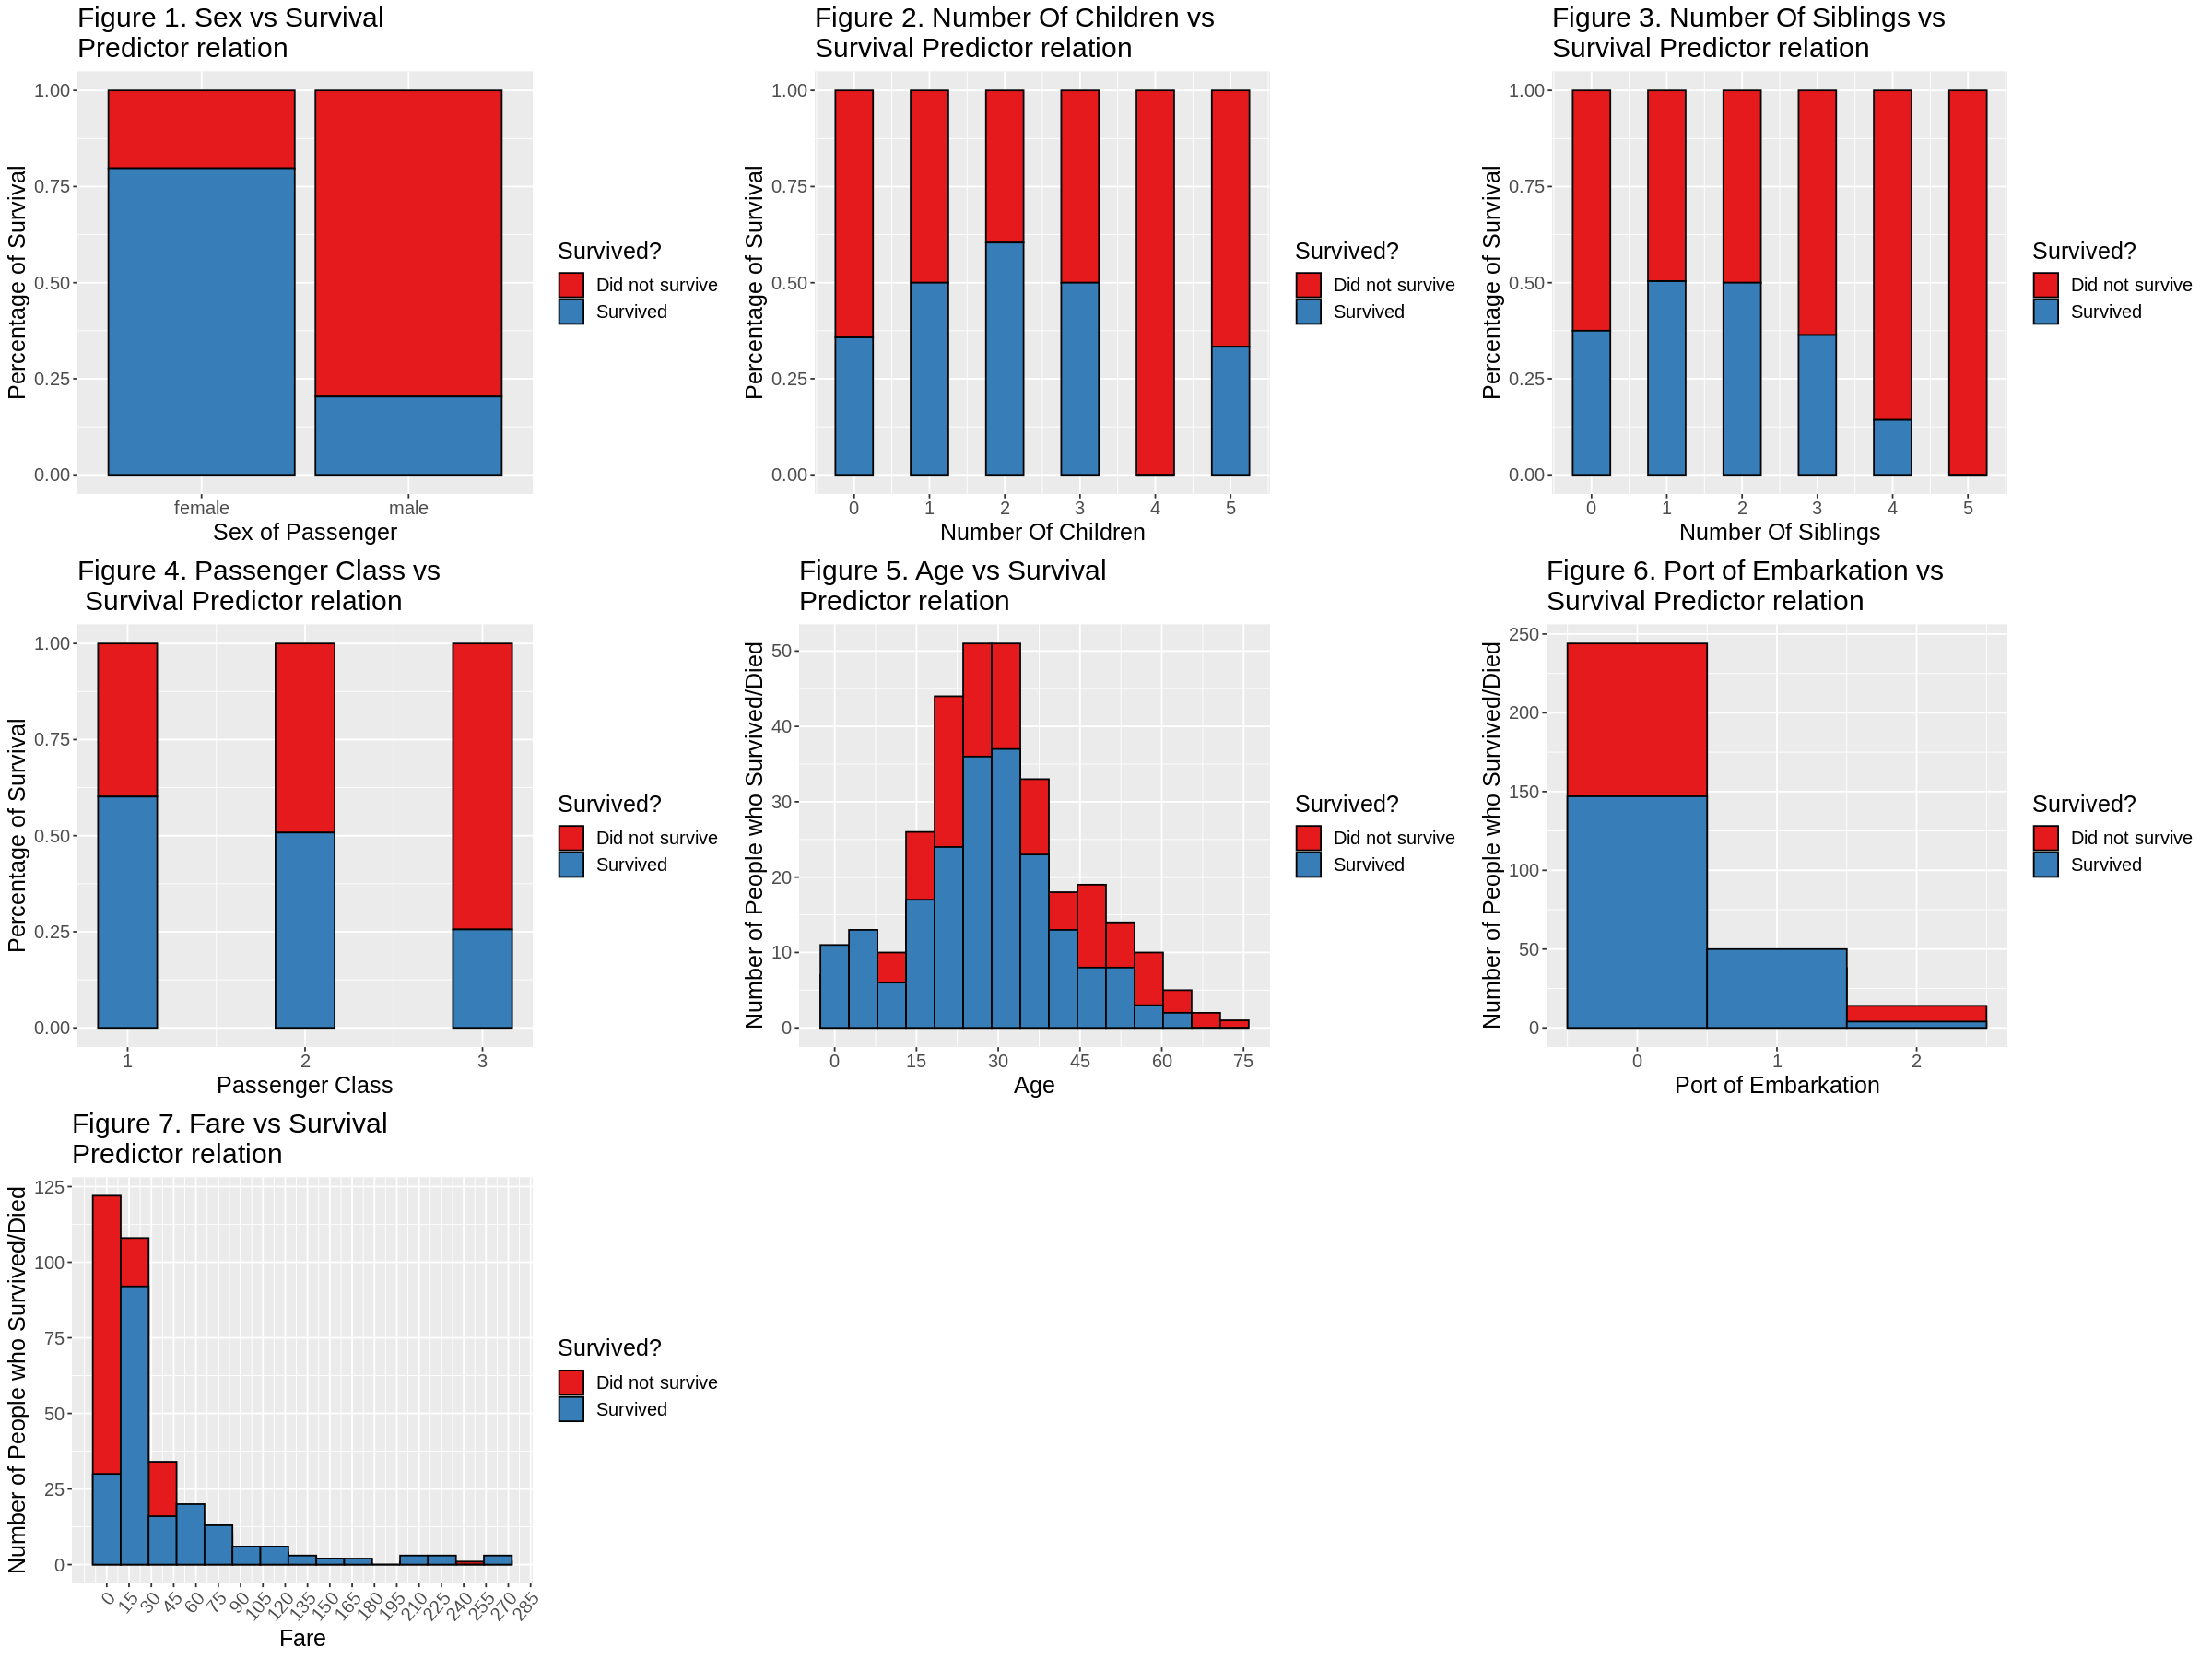

In [29]:
temp_data_graph <- boat_train |>
    mutate(Survived_char = ifelse(Survived == 1, "Survived", ifelse(Survived == 0, "Did not survive", NA)))

survival_bar_plot_sex <- ggplot(temp_data_graph, aes(x = Sex, fill = as_factor(Survived_char))) +
    geom_bar(position = "fill", col = "black") +
    labs(x = "Sex of Passenger", y = "Percentage of Survival", fill = "Survived?") +
    ggtitle("Figure 1. Sex vs Survival \nPredictor relation") +
    scale_fill_brewer(palette = "Set1") + 
    theme(text=element_text(size=15)) 

NOC_survival <- temp_data_graph |>
    ggplot(aes(x = NumberofParents_children, fill = as_factor(Survived_char))) +
    geom_histogram(bins = 11, position = "fill", col = "black") +
    labs(x = "Number Of Children", y = "Percentage of Survival", fill = "Survived?") + 
    scale_x_continuous(breaks = c(0, 1, 2,3,4,5)) +
    ggtitle("Figure 2. Number Of Children vs \nSurvival Predictor relation") +
    scale_fill_brewer(palette = "Set1") + 
    theme(text=element_text(size = 15))

NOS_survival <- temp_data_graph |>
    ggplot(aes(x = Number0fSiblings, fill = as_factor(Survived_char))) +
    geom_histogram(bins = 11, position = "fill", col = "black") +
    labs(x = "Number Of Siblings", y = "Percentage of Survival", fill = "Survived?") + 
    scale_x_continuous(breaks = c(0, 1, 2,3,4,5)) +
    ggtitle("Figure 3. Number Of Siblings vs \nSurvival Predictor relation") +
    scale_fill_brewer(palette = "Set1") +
    theme(text=element_text(size = 15))

class_survival <- temp_data_graph |>
    ggplot(aes(x = Passenger_Class, fill = as_factor(Survived_char))) +
    geom_histogram(bins = 7, position = "fill", col = "black") +
    labs(x = "Passenger Class", y = "Percentage of Survival", fill = "Survived?") + 
    scale_x_continuous(breaks = c(0, 1, 2,3)) +
    ggtitle("Figure 4. Passenger Class vs \n Survival Predictor relation") +
    scale_fill_brewer(palette = "Set1") + 
    theme(text=element_text(size = 15))

AgevSurvived <- temp_data_graph |>
    ggplot(aes(x = Age, fill = as_factor(Survived_char))) +
    geom_histogram(bins = 15, position = "identity", col = "black") +
    labs(x = "Age", y = "Number of People who Survived/Died", fill = "Survived?")+
    scale_x_continuous(breaks = seq(from = 0, to = 80, by = 15)) + 
    ggtitle("Figure 5. Age vs Survival \nPredictor relation") +
    scale_fill_brewer(palette = "Set1") +  
    theme(text=element_text(size = 15))

EmbarkedvSurvived <- temp_data_graph |>
    ggplot(aes(x = Embarked_numeric, fill = as_factor(Survived_char))) +
    geom_histogram(bins = 3, position = "identity", col = "black") +
    labs(x = "Port of Embarkation", y = "Number of People who Survived/Died", fill = "Survived?")+
    scale_x_continuous() + 
    ggtitle("Figure 6. Port of Embarkation vs \nSurvival Predictor relation") +
    scale_fill_brewer(palette = "Set1") +  
    theme(text=element_text(size = 15))

FarevSurvived <- temp_data_graph |> filter(Fare <275) |>
    ggplot(aes(x = Fare, fill = as_factor(Survived_char))) +
    geom_histogram(bins = 15, position = "identity", col = "black") +
    labs(x = "Fare", y = "Number of People who Survived/Died", fill = "Survived?")+
    scale_x_continuous(breaks = seq(from = 0, to = 285, by = 15)) + 
    ggtitle("Figure 7. Fare vs Survival \nPredictor relation") +
    scale_fill_brewer(palette = "Set1") +  
    theme(text=element_text(size = 15)) +
     theme(axis.text.x = element_text(angle = 50, hjust = 1))

options(repr.plot.width = 20, repr.plot.height = 15)
grid.arrange(survival_bar_plot_sex, NOC_survival, NOS_survival, class_survival, AgevSurvived, EmbarkedvSurvived, FarevSurvived)

The visualizations above give us an idea of what variables may be good predictors. Sex for instance, appears to heavily correlate with survival. 

Rather than using a correlation plot, we will run forward selection to determine our predictors. The above visualizations are designed to show the distribution of data so we can compare our findings with other literature (Discussion Section). 

## Methods

Using our cleaned up Titanic dataset, we decide to build a K-Nearest Neighbours Classification model to predict whether a passenger survived or not. This model operates by identifying the K nearest points to a new observation, then determines the survival status by majority vote. Our predictors for identifying the K-nearest neighbours will be determined by forward selection, which sequentially adds predictors into our model's recipe then calculates the accuracy for each one. Identifying the best predictors is important, usage of irrelevant predictors induces random influence which corrupts the set of nearest neighbours to lower our model's accuracy. 

Following forward selection, we code our recipe using the predictors identified. We then run cross-validation to select the most accurate K value. The number of neighbours we use to calculate the majority class will influence our end result, thus we try to use the best K value possible. Cross-validation is ideal because the accuracy is evaluated on a data set that was not used for training. 

We use the predictors and K value identified to train our final model, then evaluate its accuracy on the testing data. The percent accuracy of our model is a poor indicator of whether our model is good or not without a comparison. The baseline for any classification problem is the majority classifier, which will guess the majority class regardless of the predictors' values. 

## Predictor Variable Selection

In [26]:
set.seed(911)
boat_train <- boat_train |> na.omit()

boat_train_model <- boat_train |>
    select(-Sex)
#Now we start the process of developing a model to predict weather a given passenger survived the titanic crash.

boat_spec_tune <- knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

boat_vfold <- vfold_cv(boat_train_model, v = 10, strata = Survived)
k_vals <- tibble(neighbors = seq(from = 1, to = 35, by = 2))


In [27]:
set.seed(911)

names <- c("Passenger_Class", "Age", "Number0fSiblings", "NumberofParents_children", "Fare","sex_binary","Embarked_numeric")

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())


# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Survived", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        boat_recipe <- recipe(as.formula(model_string), 
                                data = boat_train_model) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(boat_recipe) |>
          add_model(boat_spec_tune) |>
          tune_grid(resamples = boat_vfold, grid = k_vals) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Survived ~ Fare,0.6782585
2,Survived ~ Fare+sex_binary,0.7986419
3,Survived ~ Fare+sex_binary+Passenger_Class,0.8128067
4,Survived ~ Fare+sex_binary+Passenger_Class+Age,0.8134094
5,Survived ~ Fare+sex_binary+Passenger_Class+Age+Number0fSiblings,0.8150468
6,Survived ~ Fare+sex_binary+Passenger_Class+Age+Number0fSiblings+NumberofParents_children,0.8312117
7,Survived ~ Fare+sex_binary+Passenger_Class+Age+Number0fSiblings+NumberofParents_children+Embarked_numeric,0.8148852


**Table 2.** Forward Selection Results

Forward selection (Table 2) suggests that using 6 variables will give us the highest accuracy. We use Fare, Sex_binary, Passenger_class, Age, and Number0fSiblings to build our recipe below. We drop NumberofParents_children as a predictor due to its the lack of an obvious relationship with the response variable(Figure 2) and the fact that it lowers accuracy when added to the model.

## Creating Initial Classification Engine & Finding the Best K Value

In [12]:
#tuning the model to find the best value of k using the best predictors as seen above.

boat_recipe <- recipe(Survived ~ Fare +sex_binary + Passenger_Class + Age + Number0fSiblings, data = boat_train_model) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

boat_model_stats <- workflow() |>
  add_recipe(boat_recipe) |>
  add_model(boat_spec_tune) |>
  tune_grid(resamples = boat_vfold, grid = k_vals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")
 
boat_model_stats
    

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7478904,10,0.01671011,Preprocessor1_Model01
3,accuracy,binary,0.8041072,10,0.01508574,Preprocessor1_Model02
5,accuracy,binary,0.8180320,10,0.01401168,Preprocessor1_Model03
7,accuracy,binary,0.8138687,10,0.01378287,Preprocessor1_Model04
9,accuracy,binary,0.8179504,10,0.01308060,Preprocessor1_Model05
11,accuracy,binary,0.8159112,10,0.01258703,Preprocessor1_Model06
13,accuracy,binary,0.8078295,10,0.01284384,Preprocessor1_Model07
15,accuracy,binary,0.8076695,10,0.01299153,Preprocessor1_Model08
17,accuracy,binary,0.8017055,10,0.01461988,Preprocessor1_Model09


<ScaleContinuousPosition>
 Range:  
 Limits:  0.4 --    1

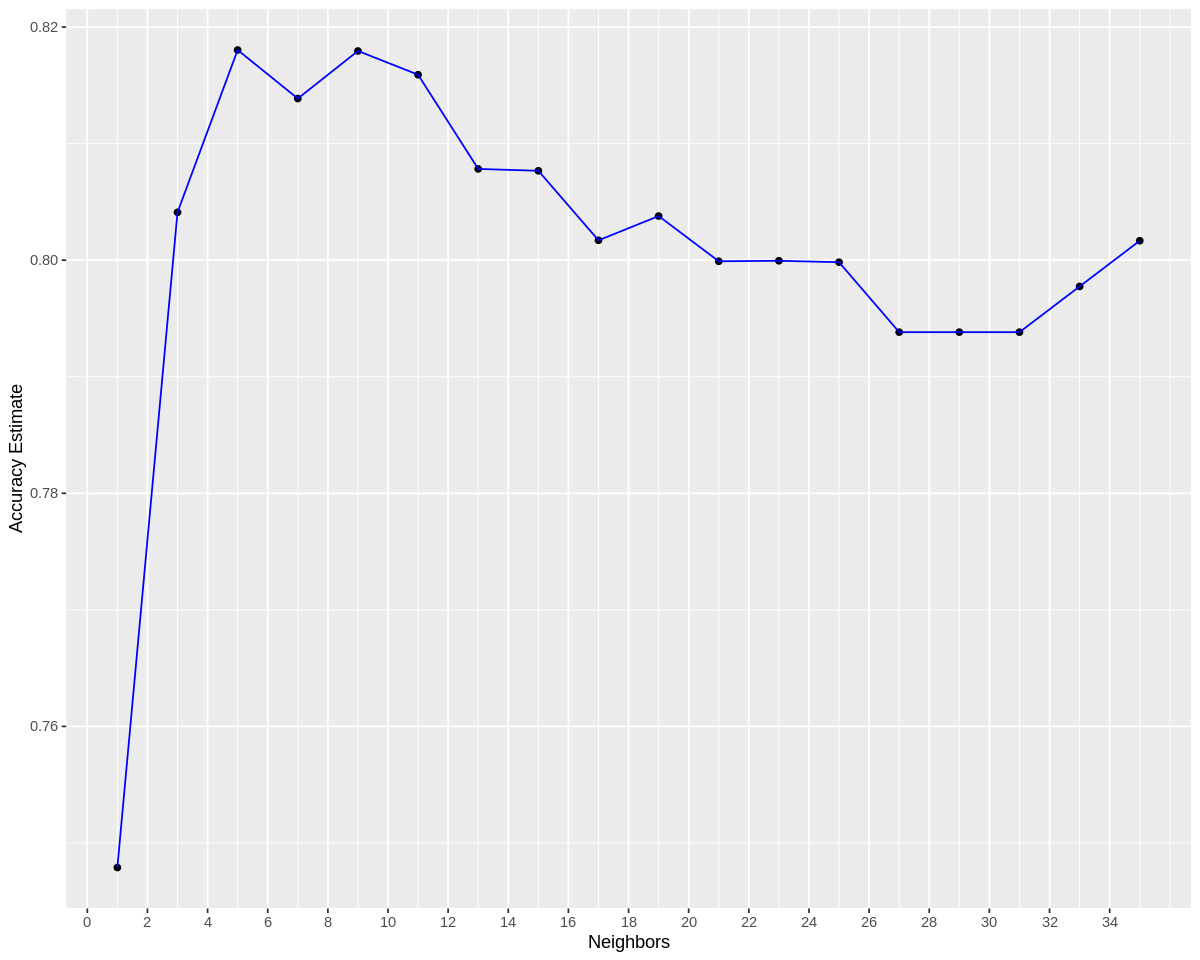

In [13]:
options(repr.plot.width = 10, repr.plot.height = 8)

accuracy_versus_k <- ggplot(boat_model_stats, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line(color = "blue") +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 35, by = 2))
       scale_y_continuous(limits = c(0.4, 1.0))

accuracy_versus_k

**Figure 8.** Cross-Validation K Values Plot. 

The best accuracy is achieved when K=5. The accuracy estimate begins to dip with large K values due to underfitting - neighbours which are poor determinants of survival status are taken into account in our majority vote. 

## Creating Final Model

In [14]:
set.seed(911)
#pulling the max value of k and retraining the model with given k:

kmax <- boat_model_stats|>
    filter(mean == max(mean)) |>
    pull(neighbors)

boat_spec <- knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmax) |>
  set_engine("kknn") |>
  set_mode("classification")

boat_fit <- workflow() |>
  add_recipe(boat_recipe) |>
  add_model(boat_spec) |>
  fit(data = boat_train_model)

kmax

[1] 5

In [15]:
set.seed(911)
#testing the model's accuracy on testing data:

accuracy_estimate <- predict(boat_fit, boat_test) |>
    bind_cols(boat_test) |>
    metrics(truth = Survived, estimate = .pred_class) |>
    filter(.metric == "accuracy")

accuracy_estimate

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8046512


**Table 3.** 80% Accuracy Rate on Testing data. 

In [16]:
#finding the majority class prediction:

majority_class <- boat_test |>
    group_by(Survived) |>
    summarise(count = n(), percentage = n()/nrow(boat_test))

majority_class

Survived,count,percentage
<fct>,<int>,<dbl>
0,128,0.5953488
1,87,0.4046512


**Table 4.** Majority class is did not survive, which makes up 60% of our data. 

In [17]:
predictions <- predict(boat_fit, boat_test) |>
    bind_cols(boat_test)


          Truth
Prediction   0   1
         0 106  20
         1  22  67

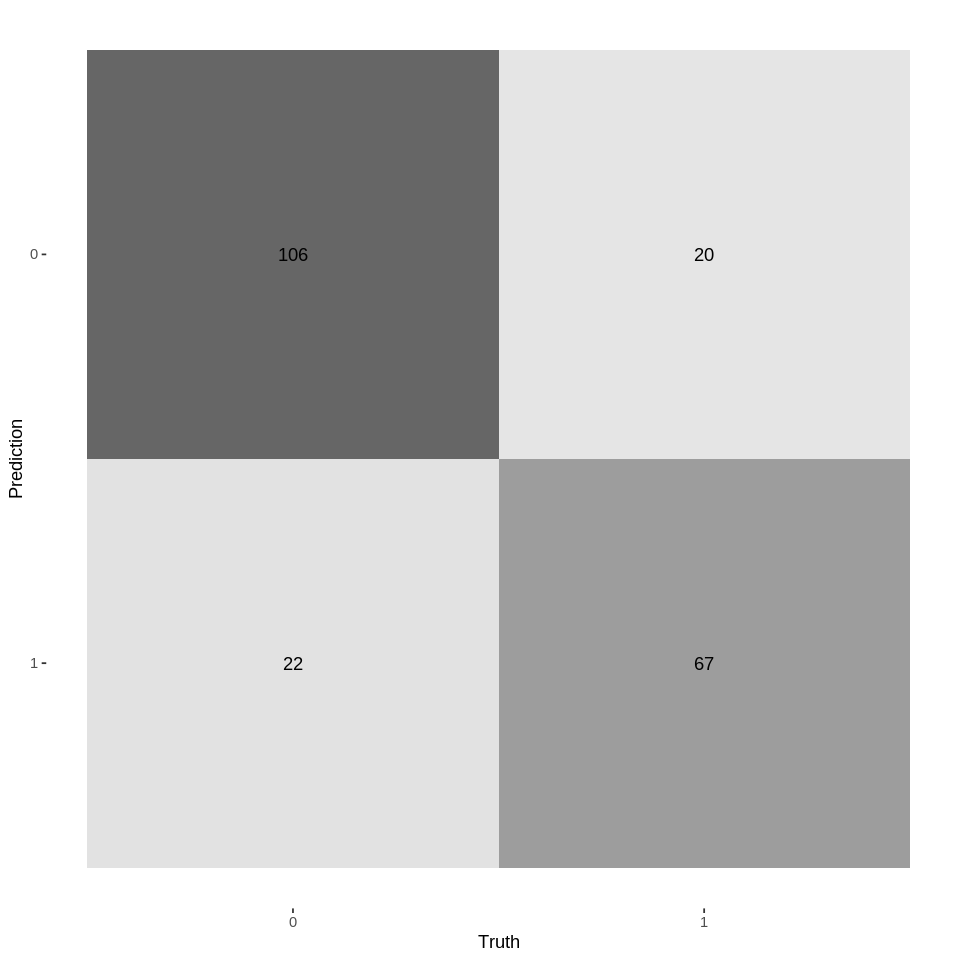

In [18]:
options(repr.plot.width = 8, repr.plot.height = 8)

confusion_matrix <- predictions |>
    conf_mat(truth = Survived, estimate = .pred_class)

confusion_matrix

autoplot(confusion_matrix,type = "heatmap", Truth ="")

**Figure 9.** Confusion matrix of our model's accuracy. For passengers that died, 106 predictions were correct out of 126 (84%). 67 were correctly predicted to survive out of 89 total (75%). 

Our model more accurately predicts death (0) compared to survival (1) of the crash.

## Final Analysis of our Model

Now that we have run testing data through our model, we analyze what types of passengers our model makes more accurate predictions on.

In [19]:
predictions %>%
group_by(sex_binary, Survived == .pred_class) %>%
summarize(count = n()) %>%
mutate(prop = count/sum(count))


`summarise()` has grouped output by 'sex_binary'. You can override using the
`.groups` argument.


sex_binary,Survived == .pred_class,count,prop
<dbl>,<lgl>,<int>,<dbl>
0,FALSE,20,0.2197802
0,TRUE,71,0.7802198
1,FALSE,22,0.1774194
1,TRUE,102,0.8225806


**Table 5.** Number of Correct Survival Predictions for each Sex 

Males (sex_binary = 1) have a better prediction accuracy compared to females (sex_binary = 0). Note that there are more males in the dataset, and the Titanic was known to have more male passengers than females. 

Based on forward selection, our strongest predictors are fare and sex (Table 2). Below, we explore the relationship between fare and survival (Fig. 10, Fig. 11), as well as sex and survival (Fig. 12, Fig. 13). 

`summarise()` has grouped output by 'Survived'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Survived'. You can override using the
`.groups` argument.
Warning message:
“Removed 6 rows containing missing values (`geom_bar()`).”


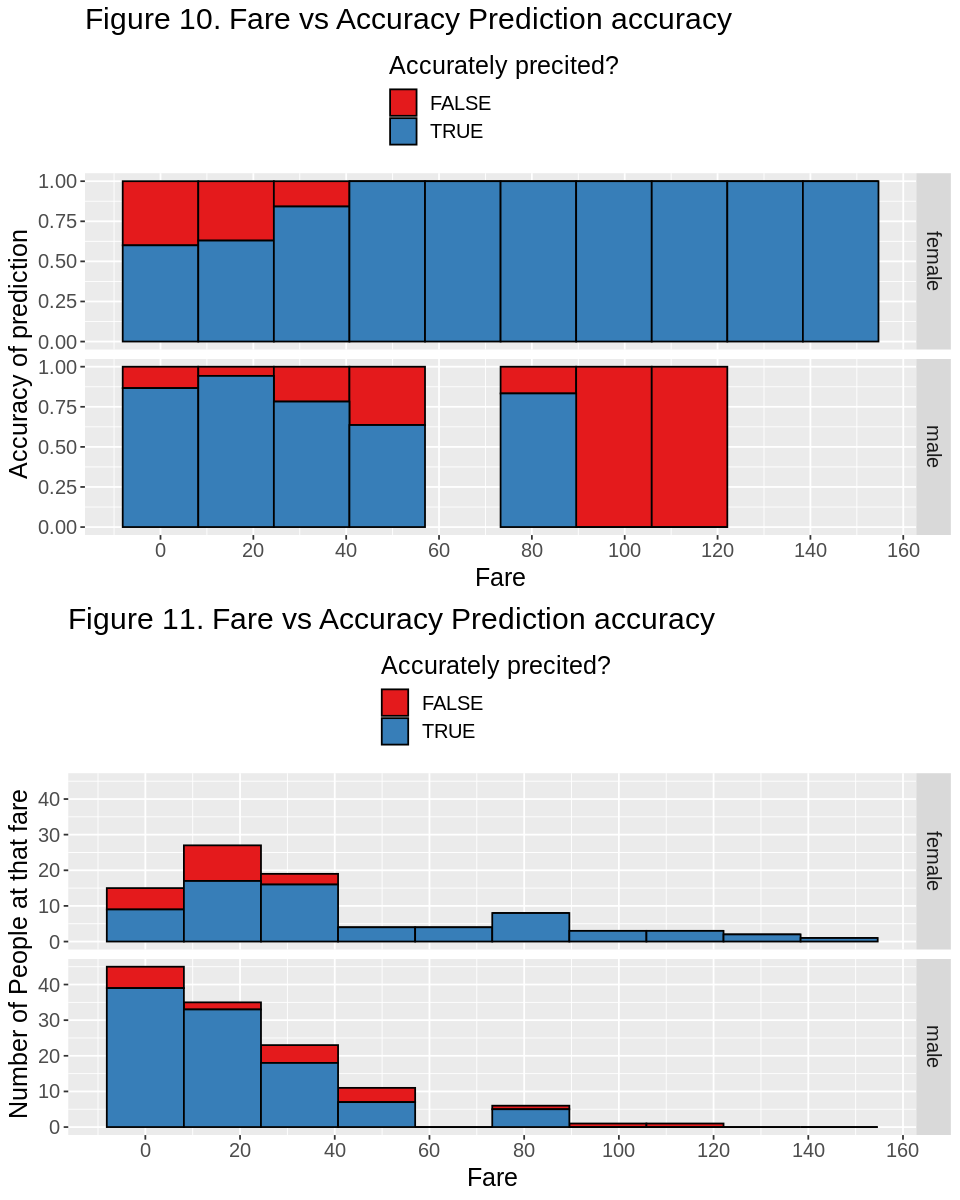

In [34]:
options(repr.plot.width = 8, repr.plot.height = 10)

FarevPredicted <- predictions |> mutate(accuracy =  Survived == .pred_class) |> filter(Fare <150) |>
    ggplot(aes(x = Fare, fill = as_factor(accuracy))) +
    geom_histogram(bins = 10, col = "black", position = "fill") +
    labs(x = "Fare", y = "Accuracy of prediction", fill = "Accurately precited?")+
    scale_x_continuous(breaks = seq(from = 0, to = 275, by = 20)) + 
    ggtitle("Figure 10. Fare vs Accuracy Prediction accuracy") +
    scale_fill_brewer(palette = "Set1") +  
    theme(text=element_text(size = 15), legend.position = "top", legend.direction = "vertical")+
    facet_grid(Sex ~.)

FarevPredicted2 <- predictions |> mutate(accuracy =  Survived == .pred_class) |> filter(Fare <150) |>
    ggplot(aes(x = Fare, fill = as_factor(accuracy))) +
    geom_histogram(bins = 10, col = "black") +
    labs(x = "Fare", y = "Number of People at that fare", fill = "Accurately precited?")+
    scale_x_continuous(breaks = seq(from = 0, to = 275, by = 20)) + 
    ggtitle("Figure 11. Fare vs Accuracy Prediction accuracy") +
    scale_fill_brewer(palette = "Set1") +  
    theme(text=element_text(size = 15), legend.position = "top", legend.direction = "vertical")+
    facet_grid(Sex ~.)

sexvPredicted_male <- predictions |> filter(Sex == "male") %>%
group_by(Survived, is_accurate = Survived == .pred_class) %>%
summarize(count = n()) %>%
mutate(prop = count/sum(count)) %>%
filter(is_accurate) %>%
ggplot()+
geom_bar(aes(x = Survived, y = prop), stat = "identity", fill = "deepskyblue", col = "black") + 
labs(x = "Sex", y = "Accuracy of prediction (in percent)") +
ggtitle("Figure 12. Sex vs Percentage accuracy (for men)") +
theme(text=element_text(size = 15))

sexvPredicted_female <- predictions |> filter(Sex == "female") %>%
group_by(Survived, is_accurate = Survived == .pred_class) %>%
summarize(count = n()) %>%
mutate(prop = count/sum(count)) %>%
filter(is_accurate) %>%
ggplot()+
geom_bar(aes(x = Survived, y = prop), stat = "identity", fill = "deepskyblue", col = "black") + 
labs(x = "Sex", y = "Accuracy of prediction (in percent)") +
ggtitle("Figure 13. Sex vs Percentage accuracy (for women)") +
theme(text=element_text(size = 15))

grid.arrange(FarevPredicted, FarevPredicted2)

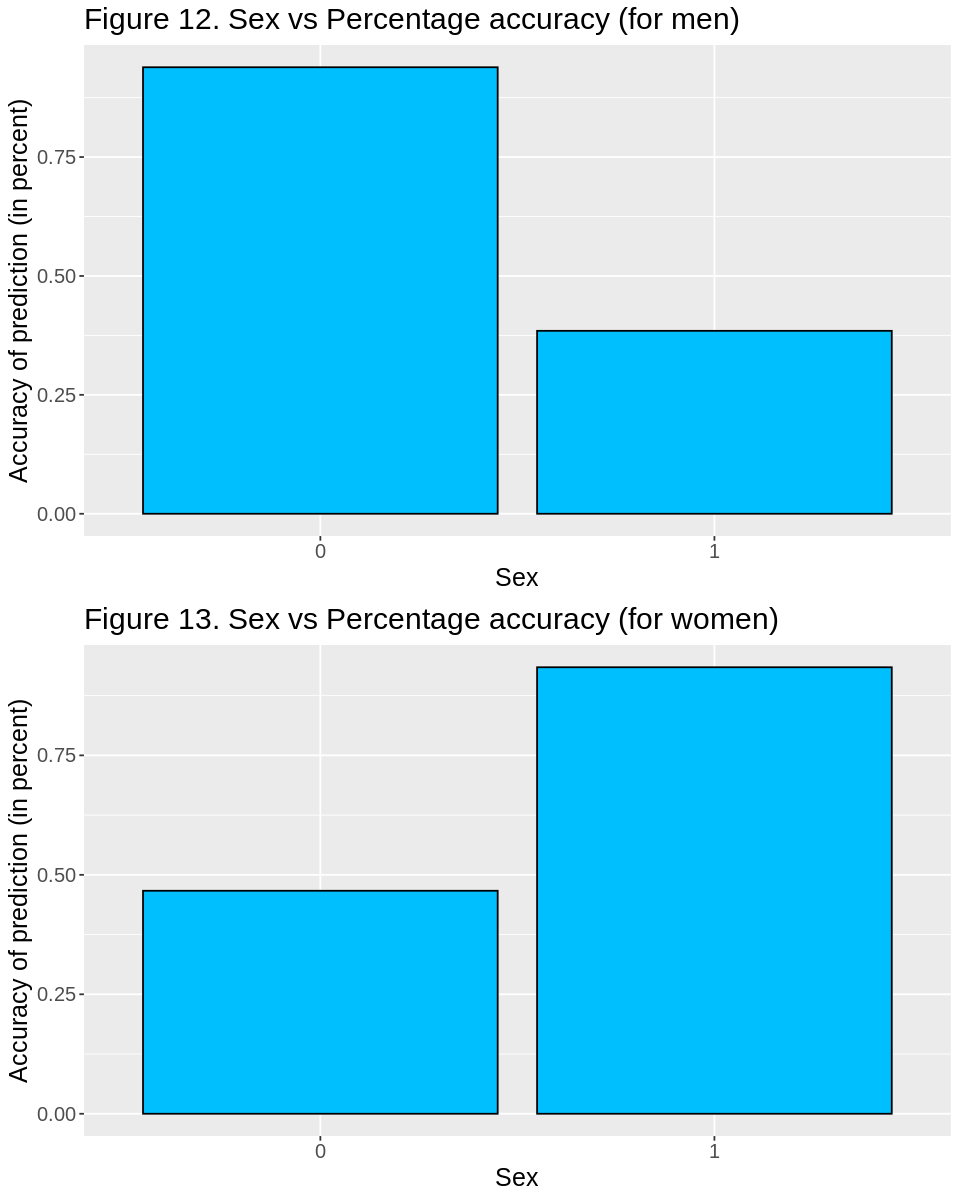

In [35]:
grid.arrange(sexvPredicted_male, sexvPredicted_female)

## Discussion

### Exploratory Data Analysis: Discussion of Figure 1 - Figure 7

We found a lot of relations between variables which became clear once visualized. Below we compare them to other literature data:

**Sex vs. Survival (Fig. 1):**

In this bar graph, we can see that a greater percentage of females survived compared to males. These results align with what we expected to find as well as what we found in the literature. Frey et al. (2011) noted that female passengers had a 53% higher chance of survival than males. Hall (1982) discussed that ”the sex difference in overall survival was the result of policy [and] because of the known scarcity of positions in the lifeboat women and children were given preference in selecting persons for the limited number of positions available”.

**Number of Children vs. Survival (Fig. 2):**

We found that there was no obvious trend in this visualization, indicating that a passenger’s number of children did not have much of an effect, if any, on their chance of survival. 

**Number of Siblings vs. Survival (Fig. 3):**

Similar to the number of children, there wasn’t much of a trend in the visualization. However, the number of siblings variable was kept because forward selection (Table 2) suggests increased accuracy when included. 

**Passenger Class vs. Survival (Fig. 4):**

There was a very clear trend in the visualization showing that more passengers survived in Class 1 compared to Class 2, and significantly fewer passengers survived in Class 3 compared to both Class 1 and 2. These results align with data found in another analysis where it was found that 40% more first-class passengers and almost 16% more second-class passengers had a chance to be saved compared to third-class passengers (Frey et al., 2011). This was due to first and second-class passengers being prioritized on lifeboats rather than third-class passengers.

**Age vs. Survival (Fig. 5):** 

There was a trend observed in this visualization as the histogram shows that the majority of passengers that did not survive were around the age of majority of those on the ship, which is approximately 30 years old. Additionally, people who were under the age of majority showed a better chance of survival than those over the age of majority. This observation aligns with our predictions, considering the elderly were likely less physically fit, and children would have a better chance of survival because they were prioritized for lifeboats. This also aligns with the findings of Frey et al. (2011) who found that even a slight difference from the average age of 30 was linked to a 0.7% drop in survival. 

**Embarked vs. Survival (Fig. 6):**

The visualization revealed the difference in the number of people that survived based on which port they had embarked from. Forward selection (Table 2) however suggests that inclusion of this variable decreases accuracy. It appeared that port of embarkation didn’t necessarily play a role in survival status, rather that the groups that embarked at each port were not equal in the distribution of the other predictors. 

**Fare vs. Survival (Fig. 7):** 

There was a very significant trend in this visualization as it revealed that the majority of passengers that did not survive paid a fare less than 15 British Pounds and the vast majority of passengers that paid more than 15 pounds survived. This trend follows the observations made by the class predictor, as a higher fare corresponds to the higher class.


### Final Analysis

Our KNN classification model has an accuracy of 80.46% (Table 3). This is a 20.93% improvement over the majority classifier which would have an accuracy of 59.53% (Table 4). This tells us that the model is drawing useful information from our predictors. The accuracy varies slightly, with it being a bit more accurate at predicting if a passenger died (84%) compared to if they survived (75%) (Fig. 9). This might be due to having more dead passengers in our training data set, biasing our model to predict it with more accuracy. 

As well, the model was less accurate in predicting women at low fares below 40 pounds, but more accurate in predicting men’s at lower fares (Fig. 10, Fig. 11). This may be attributed to a high survival rate of higher class people and women in general. The model wants to generalize that women survive but lower fare people are less of a priority which causes conflicts leading to the observed error in women. Men however are predicted to die more often, but at high class are socially prioritized and survive.

Gender survival predictions show a significant disparity. The model is 38% accurate in predicting men's survival, but 90% accurate in predicting their death (Fig. 12). For women, it is 90% accurate in predicting survival and 45% accurate in predicting death (Fig. 13). The model is biased due to imbalanced training data, with over 75% of women surviving and over 75% of men dying. Thus, the model is biased to predict women's survival and men's death.

Figure 9 shows that the model was 75% accurate for predicting living passengers, but 84% accurate for predicting deaths. This difference in accuracy may be explained by the larger proportion of deaths in our training data.  

### Reflection Section
The significance of our findings provide quantitative support for the hierarchy in which passengers were prioritized for leaving the Titanic. Women, passengers of high social class, and those with expensive fares clearly had better survival rates. This prioritization however is not ethical nor fair, raising the question of what would we do differently as we have evolved towards equity as a society? 

Some future questions to advance our model: 
- Could the model be improved through the addition of other predictor variables? Perhaps if we had more information, such as information about their lifestyle or proximity to lifeboats, we would be able to make better predictions. 
- Could our model be modified to predict the survival of a passenger on another ship? What about other accidents such as airplane crashes? What limitations exist for models like this? 

## References

Frey, B. S., Savage, D. A., & Torgler, B. (2011). Behavior under Extreme Conditions: The Titanic Disaster. Journal of Economic Perspectives, 25(1), 209–222. https://doi.org/10.1257/jep.25.1.209

Hall, W. (1982) Social Class and Survival on the S.S. Titanic. Social Science & Medicine, 22(6), 687-690.  https://doi.org/10.1016/0277-9536(86)90041-9  

Titanic - Machine learning from disaster. (n.d.). Kaggle. https://www.kaggle.com/competitions/titanic/data?select=train.csv